In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
os.chdir("U:\\Dokumenty\\_personal\\2023\\run_analysis")
os.getcwd()
os.listdir(os.getcwd())

['All_activities.csv',
 'All_activities1.txt',
 'All_activities_20230227.csv',
 'All_activities_20230227_v1.txt',
 'analysis.xlsx',
 'Trebon.csv',
 'Trebon1.txt',
 'Wien.csv',
 'Wien1.txt']

In [3]:
data = pd.read_csv("Wien1.txt",sep=",",error_bad_lines=False)

c:\users\tbenko\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 46: expected 26 fields, saw 27\n'


In [4]:
data[["Čas","Průměrné tempo","Nejlepší tempo","Čas pohybu","Průměrné tempo pohybu"]] = data[["Čas","Průměrné tempo","Nejlepší tempo","Čas pohybu","Průměrné tempo pohybu"]].apply(pd.to_datetime)

In [5]:
for i in data["Čas"]:
    if i < pd.to_datetime("2023-02-20 03:50:00"):
        print(i)

In [6]:
#data = data.drop([35,0])

In [7]:
table = []

In [8]:
table

[]

In [9]:
table.append(data["Čas"].groupby(np.arange(len(data["Čas"]))//10).mean())
table.append(data["Nejlepší tempo"].groupby(np.arange(len(data["Nejlepší tempo"]))//10).min())
table.append(data["Nejlepší tempo"].groupby(np.arange(len(data["Nejlepší tempo"]))//10).max())

In [10]:
results = pd.DataFrame(table).T

In [11]:
results.columns = ["time","best_time","worst_time"]

In [12]:
results["time_spread"] = results["worst_time"]-results["best_time"]

In [13]:
results["step_length"] = data["Průměrná délka kroku"].groupby(np.arange(len(data["Průměrná délka kroku"]))//10).mean()

In [14]:
results["bpm"] = data["Průměrný ST"].groupby(np.arange(len(data["Průměrný ST"]))//10).mean()

In [15]:
data.loc[data["Celkový výstup"] == "--","Celkový výstup"] = 0
data.loc[data["Celkový sestup"] == "--","Celkový sestup"] = 0

In [16]:
data["Celkový výstup"] = data["Celkový výstup"].astype(int)
data["Celkový sestup"] = data["Celkový sestup"].astype(int)

In [17]:
results["climb"] = data["Celkový výstup"].groupby(np.arange(len(data["Celkový výstup"]))//10).mean()
results["descent"] = data["Celkový sestup"].groupby(np.arange(len(data["Celkový sestup"]))//10).mean()

In [18]:
results.to_clipboard(decimal=",")

In [19]:
"####"*100

'################################################################################################################################################################################################################################################################################################################################################################################################################'

In [158]:
data_all = pd.read_csv("All_activities_20230227_v1.txt",sep=",",error_bad_lines=False)

c:\users\tbenko\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 83: expected 41 fields, saw 42\nSkipping line 153: expected 41 fields, saw 42\nSkipping line 243: expected 41 fields, saw 44\nSkipping line 299: expected 41 fields, saw 42\nSkipping line 340: expected 41 fields, saw 43\nSkipping line 423: expected 41 fields, saw 42\nSkipping line 511: expected 41 fields, saw 42\nSkipping line 696: expected 41 fields, saw 42\nSkipping line 697: expected 41 fields, saw 42\nSkipping line 700: expected 41 fields, saw 42\n'


In [159]:
data_all.tail(1)

,Typ aktivity,Datum,Oblíbený,Název,Vzdálenost,Kalorie (kcal),Čas,Průměrný ST,Maximální ST,Aerobní TE,...,Minimální teplota,Povrchový interval,Dekomprese,Čas nejlepšího okruhu,Počet okruhů,Maximální teplota,Čas pohybu,Uplynulý čas,Minimální nadmořská výška,Maximální nadmořská výška
748,Běh,2016-10-15 15:39:00,False,Slatina Běh,10.72,555,00:44:19,152,166,3.8,...,0.0,0:00,Ne,00:00.00,--,0.0,00:00:00,00:00:00,445,520


In [160]:
data_all.head(1)

,Typ aktivity,Datum,Oblíbený,Název,Vzdálenost,Kalorie (kcal),Čas,Průměrný ST,Maximální ST,Aerobní TE,...,Minimální teplota,Povrchový interval,Dekomprese,Čas nejlepšího okruhu,Počet okruhů,Maximální teplota,Čas pohybu,Uplynulý čas,Minimální nadmořská výška,Maximální nadmořská výška
0,Běh,2023-02-26 15:47:05,False,Praha Běh,11.01,596,00:55:47,136,167,2.6,...,0.0,0:00,Ne,00:02.82.8,12,0.0,00:55:45,00:57:17,183,339


In [161]:
data_all["Datum"].min() +" - start : konec - " + data_all["Datum"].max()

'2016-10-15 15:39:00 - start : konec - 2023-02-26 15:47:05'

In [162]:
pd.to_datetime(data_all["Datum"].max())-pd.to_datetime(data_all["Datum"].min())

Timedelta('2325 days 00:08:05')

In [163]:
data_all["year"] = pd.to_datetime(data_all["Datum"]).dt.year
data_all["month"] = pd.to_datetime(data_all["Datum"]).dt.month

In [164]:
data_all["Datum"] = pd.to_datetime(data_all["Datum"])

In [250]:
data_all[(data_all["Typ aktivity"] == "Běh")][["Průměrné tempo","Celkový výstup"]].corr()

,Celkový výstup
Celkový výstup,1.0


In [166]:
data_all["activity_count"] = 1

In [167]:
data_all["Typ aktivity"].unique()

array(['Běh', 'Cyklistika', 'Ostatní', 'Běh na pásu'], dtype=object)

In [168]:
data_all[(data_all["Typ aktivity"] == "Běh")][["year","activity_count"]].groupby(data_all["year"]).agg({"activity_count":sum})

,activity_count
year,
2016,22
2017,121
2018,122
2019,102
2020,137
2021,109
2022,99
2023,23


In [169]:
data_all[(data_all["Typ aktivity"] == "Běh")][["year","Vzdálenost"]].groupby(data_all["year"]).agg({"Vzdálenost":sum})

,Vzdálenost
year,
2016,189.24
2017,1019.22
2018,980.77
2019,800.84
2020,998.99
2021,921.43
2022,806.17
2023,194.96


In [170]:
data_all["Celkový výstup"] = pd.to_numeric(data_all["Celkový výstup"],errors="coerce")
data_all["Celkový sestup"] = pd.to_numeric(data_all["Celkový sestup"],errors="coerce")

In [171]:
data_all[(data_all["Typ aktivity"] == "Běh")][["year","month","Vzdálenost"]].groupby(["year","month"]).agg({"Vzdálenost":sum}).to_clipboard(decimal=",")

<AxesSubplot:xlabel='year', ylabel='activity_count'>

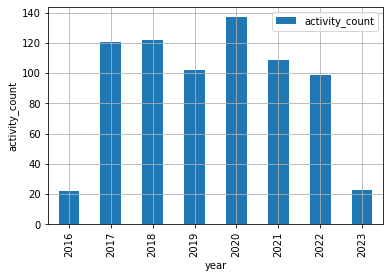

In [173]:
data_all[(data_all["Typ aktivity"] == "Běh")][["year","activity_count"]].groupby(data_all["year"]).agg({"activity_count":sum}).plot(kind="bar", 
                                                                                                                                    #table=True, 
                                                                                                                                    ylabel="activity_count", 
                                                                                                                                    xlabel="year", 
                                                                                                                                    grid = bool)

In [174]:
data_all[(pd.to_datetime(data_all["Datum"]) > "15.05.2021") & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].sum()

1599.35

In [175]:
aktivita = ("Běh")

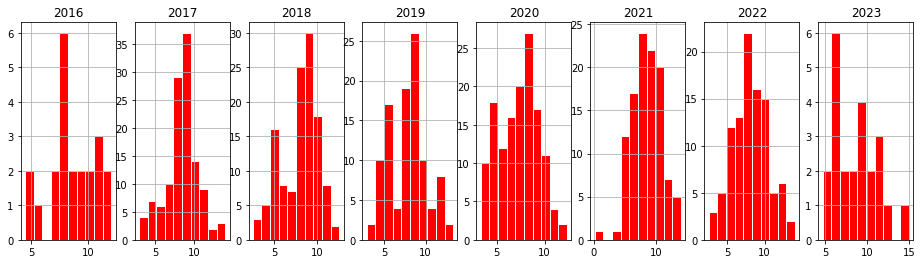

In [176]:
fig, axes = plt.subplots(1,8, figsize=(16,4))
run_2016 = data_all[(data_all["year"] == 2016) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[0],color="red",ec="white").set_title("2016")
run_2017 = data_all[(data_all["year"] == 2017) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[1],color="red",ec="white").set_title("2017")
run_2018 = data_all[(data_all["year"] == 2018) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[2],color="red",ec="white").set_title("2018")
run_2019 = data_all[(data_all["year"] == 2019) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[3],color="red",ec="white").set_title("2019")
run_2020 = data_all[(data_all["year"] == 2020) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[4],color="red",ec="white").set_title("2020")
run_2021 = data_all[(data_all["year"] == 2021) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[5],color="red",ec="white").set_title("2021")
run_2022 = data_all[(data_all["year"] == 2022) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[6],color="red",ec="white").set_title("2022")
run_2023 = data_all[(data_all["year"] == 2023) & (data_all["Typ aktivity"] == "Běh")]["Vzdálenost"].hist(ax=axes[7],color="red",ec="white").set_title("2023")

In [177]:
data_all[(data_all["Typ aktivity"] == "Běh") & (data_all["Vzdálenost"] > 5)][["Datum","Vzdálenost","Čas"]].sort_values(by = "Vzdálenost", ascending = False).nlargest(n= 10, columns=["Vzdálenost"])

,Datum,Vzdálenost,Čas
9,2023-02-05 11:03:29,14.95,01:18:20
51,2022-10-16 10:46:07,14.09,01:17:13
191,2021-05-15 10:37:26,14.02,01:11:38
697,2017-03-19 17:41:43,14.01,01:06:38
26,2022-12-24 10:40:08,14.01,01:16:47
381,2019-12-07 15:26:16,13.33,01:10:13
716,2017-01-28 10:35:57,13.20,01:01:43
705,2017-02-25 10:05:35,13.03,00:57:57
155,2021-08-11 11:13:58,13.02,01:05:31
142,2021-09-21 18:33:19,13.01,01:04:35


<AxesSubplot:ylabel='Frequency'>

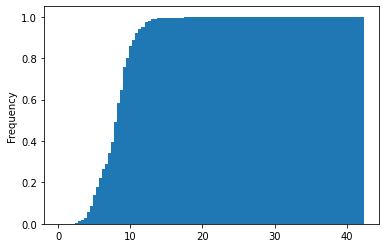

In [179]:
data_all[data_all["Vzdálenost"] < 50]["Vzdálenost"].plot.hist(density = 1, cumulative=True, bins = 100)

In [181]:
data_all["Průměrné tempo"] = pd.to_datetime(data_all["Průměrné tempo"], errors="coerce").dt.time

In [189]:
data_all.loc[585,"Komentář"] = "Fotbal"
data_all.loc[601,"Komentář"] = "Fotbal"
data_all.loc[611,"Komentář"] = "Fotbal"

In [218]:
def poradi(x):
    vzdalenost = data_all[(data_all["Typ aktivity"] == "Běh") & (data_all["Vzdálenost"] > 5.01) & (data_all["Komentář"] != "Fotbal")][["Datum",x]].sort_values(by = x, ascending = False)
    vzdalenost["Pořadí"] = range(1, 1+len(vzdalenost))
    nejlepsi_beh = vzdalenost[vzdalenost[x] == vzdalenost[x].max()]
    posledni_beh = vzdalenost[vzdalenost["Datum"] == vzdalenost["Datum"].max()]
    nejhorsi_beh = vzdalenost[vzdalenost[x] == vzdalenost[x].min()]
    return(nejlepsi_beh, posledni_beh, nejhorsi_beh)

In [219]:
poradi("Vzdálenost")

(                Datum  Vzdálenost  Pořadí
 9 2023-02-05 11:03:29       14.95       1,
                 Datum  Vzdálenost  Pořadí
 0 2023-02-26 15:47:05       11.01      67,
                   Datum  Vzdálenost  Pořadí
 731 2016-12-22 07:15:17        5.03     653)

<AxesSubplot:xlabel='year,month'>

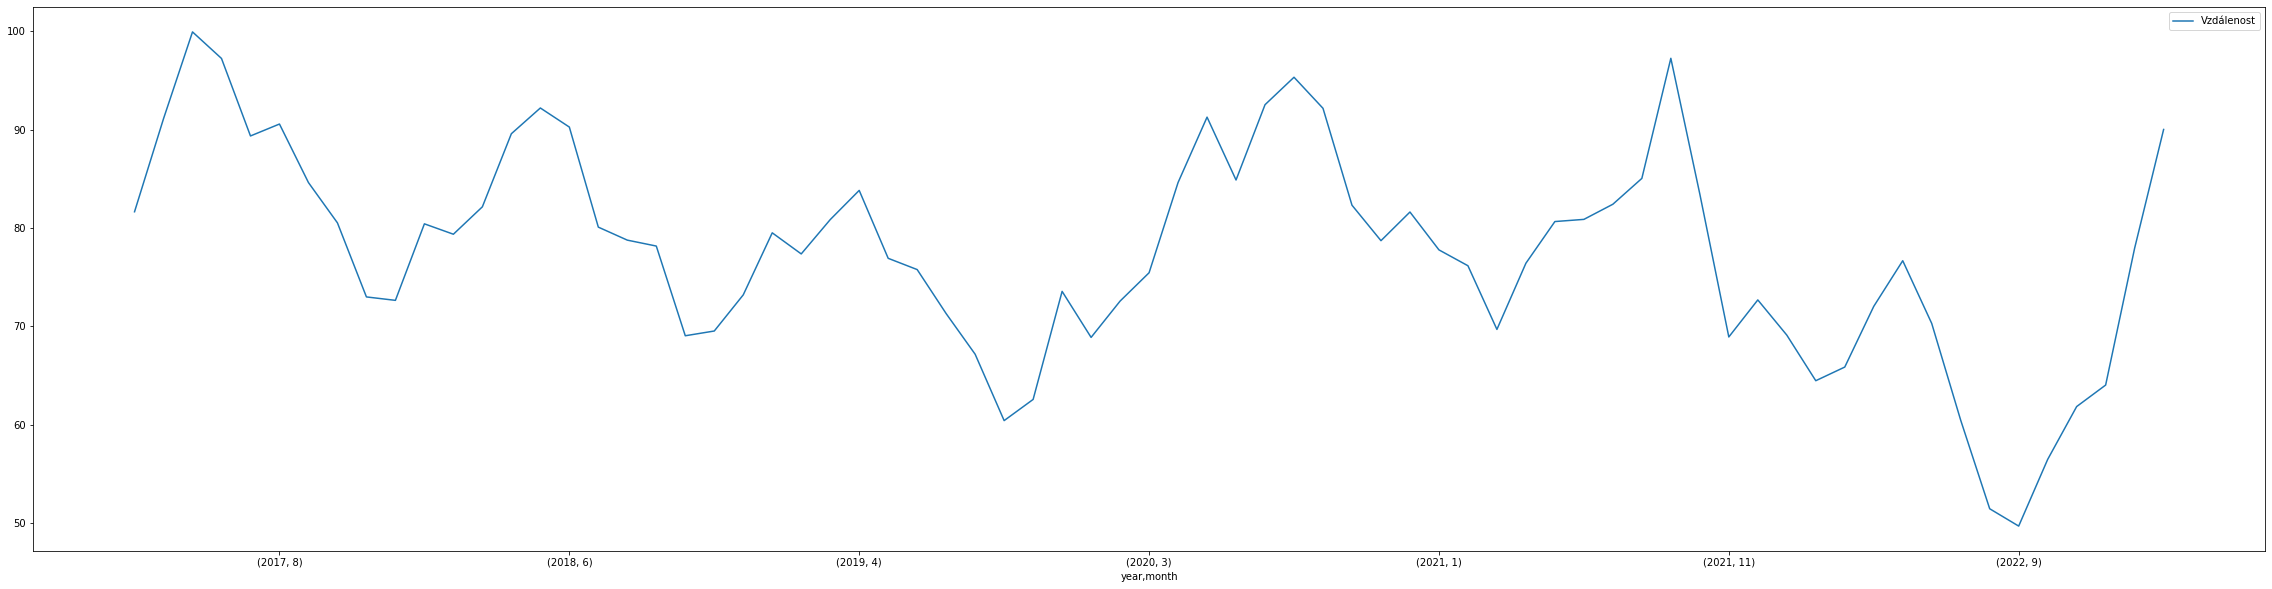

In [235]:
data_all_month = data_all[(data_all["Typ aktivity"] == "Běh")][["year","month","Vzdálenost"]].groupby(["year","month"]).agg({"Vzdálenost":sum})
data_all_month[data_all_month["Vzdálenost"] < 31].reset_index()
data_all_month.groupby(["year","month"]).agg({"Vzdálenost":sum}).rolling(6).mean().plot(kind = "line", figsize = (40,10))#reset_index()#.to_clipboard(decimal=",")

<AxesSubplot:xlabel='year,month'>

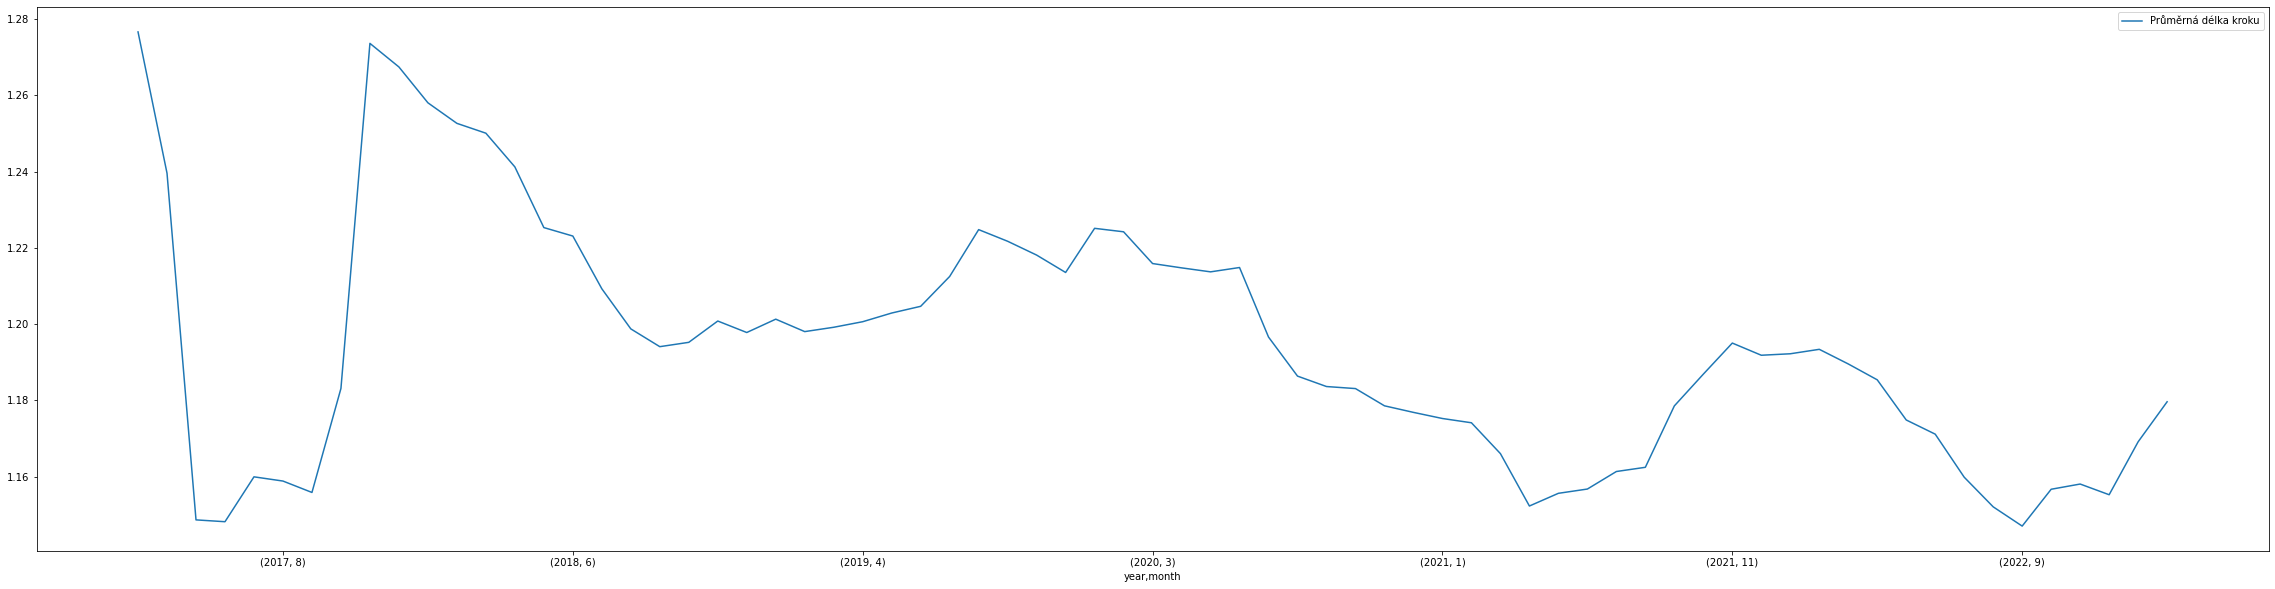

In [248]:
data_all[(data_all["Typ aktivity"] == "Běh") & (data_all["Komentář"] != "Fotbal")][["year","month","Průměrná délka kroku"]].groupby(["year","month"]).agg({"Průměrná délka kroku":np.mean}).rolling(6).mean().plot(kind = "line", figsize = (40,10))

<AxesSubplot:xlabel='year,month'>

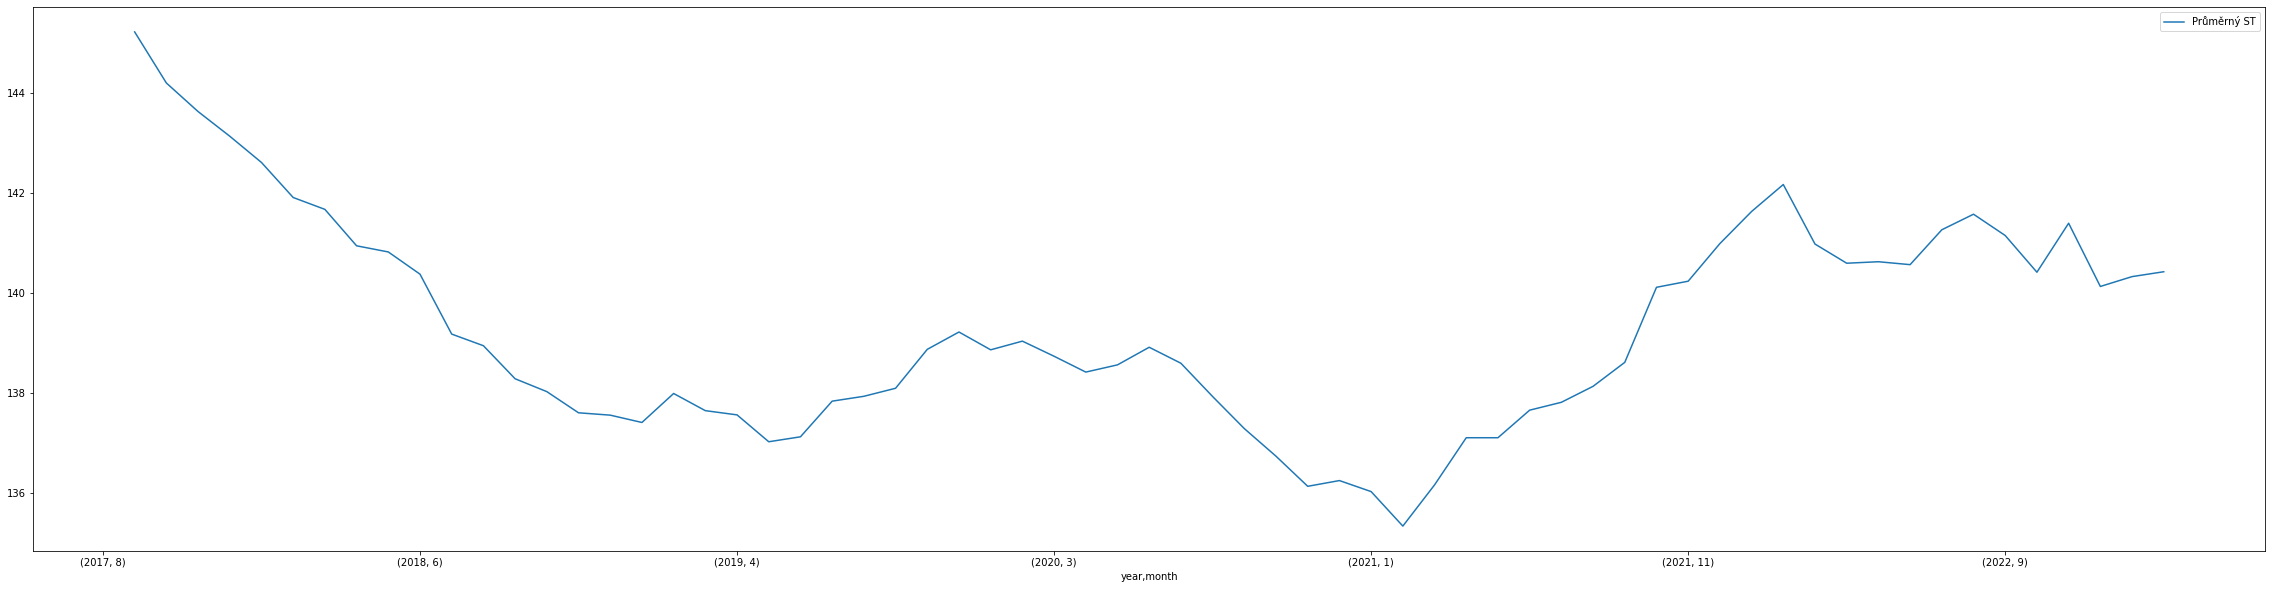

In [247]:
data_all[(data_all["Typ aktivity"] == "Běh") & (data_all["Komentář"] != "Fotbal")][["year","month","Průměrný ST"]].groupby(["year","month"]).agg({"Průměrný ST":np.mean}).rolling(12).mean().plot(kind = "line", figsize = (40,10))

<AxesSubplot:xlabel='Průměrné tempo', ylabel='Celkový výstup'>

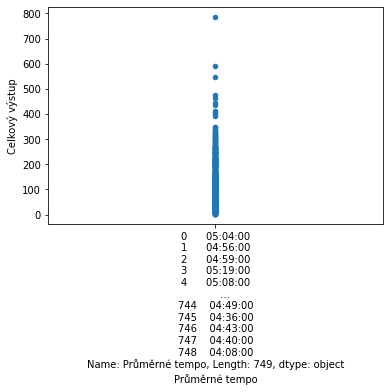

In [255]:
data_all["Průměrné tempo"] = str(data_all["Průměrné tempo"])
data_all[(data_all["Typ aktivity"] == "Běh")][["Průměrné tempo","Celkový výstup"]].plot(kind="scatter", x="Průměrné tempo" , y="Celkový výstup")
# add decremental values to tempo and plot